#Usage of Autoencoders to create synthetic datasets
This notebook will show you how to create and implement Autoencoders and VAE systems respectively. The dataset that will be using is the Fashion MNIST Data set comprised of 28x28 images of 10 different articles of clothing. More details below:

#Libraries, Dataset Installation, etc.:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Define a transform to convert the images to tensors (and optionally normalize)
transform = transforms.Compose([
    transforms.ToTensor(),                  # Converts image to [0, 1] range
    transforms.Lambda(lambda x: x.view(-1))   # Flatten the image
])

# Download and load the training data
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Download and load the test data
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Wrap the datasets with DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

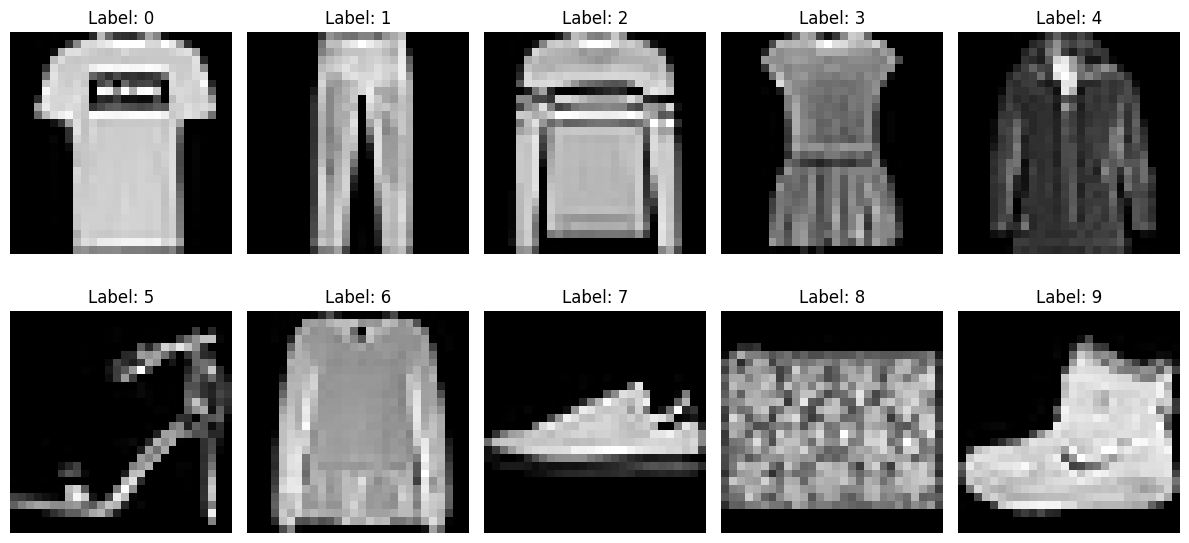

In [ ]:
# Dictionary to store the first image for each unique label
found = {}

# Iterate through the dataset to find one image per label
for img, label in train_dataset:
    if label not in found:
        found[label] = img
    if len(found) == 10:  # FashionMNIST has 10 classes
        break

# Plot one image for each unique label after reshaping to 28x28
plt.figure(figsize=(12, 6))
for label, img in found.items():
    plt.subplot(2, 5, label + 1)
    plt.imshow(img.view(28, 28), cmap='gray')  # Reshape the flattened image back to 28x28
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.tight_layout()
plt.show()

**Labels being**:  
0: T-shirt/top  
1: Trouser  
2: Pullover  
3: Dress  
4: Coat  
5: Sandal  
6: Shirt  
7: Sneaker  
8: Bag  
9: Ankle boot  

#Part 1: Simple Autoencoders

##Instructions:
We will create a very simple autoencoder. Autoencoders follow two main steps:<br>
1. **Encoding**: Reducing dimensionality into a latent space
2. **Decoding**: Increasing dimensionality from the latent space to the original matrix dimensions  

Try to create the individual modules yourself. Some helpful functions are listed below:  

*  `nn.Sequential()`: Another way of organizing steps in architecture. Just list
the steps in order of how you want the model to run. Helpful when you are trying to segment larger custom architectures for readability. For example a previous CNN that we have made...


```
class CNN(nn.Module):
  def __init__(self):
    #3 color channels so start with 3
        super(CNN, self).__init__()
        
        #Defining unique layers
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
    #Pooling layer stays constant
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    # Pooling layer of 2 causes the images w/h to decrease by half each time, final size before condensing is therefore 4x4
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer with 20% dropout rate, retains the 10 classes at the end
        self.fc1 = nn.Linear(32*4*4,10)

  def forward(self, x):
  
        #Assembling architecture from layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.softmax(self.conv3(x)))
        x = self.dropout(x)  # Apply dropout
        x = torch.flatten(x,1)  # Hint: Flatten before passing to fully connected layer
        x = self.fc1(x)
        return x
```
Can be equivalently written as:
```
model = nn.Sequential(
    #Just list the steps from begining to end
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Dropout(p=0.2),
    nn.Flatten(),
    nn.Linear(32*4*4, 10)
)
```

Where you can further organize into smaller sequential chunks if you want. Note that you don't have to define the entire model in one sequential statement and should still use a forward function when defining a class. Also the output of the previous line automatically becomes the input of the next line within `nn.Sequential`.
*  `nn.Linear(input_dim,out_dim)`: Used for compressing or expanding dimensions
*  `nn.Relu()` or `nn.Sigmoid()`: Activation functions




##Try it yourself:
Create a model:  
1. Encodes an image from the original size to 128 dimensions
2. Encodes again from 128 to 64 dimensions (Reaching the latent space)
3. Decodes from the latent space to 128 dimensions
4. Decodes from 128 dimensions back to the original size

In [ ]:
# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder: compress the image (28x28) to a 64-dimensional representation
        self.encoder = nn.Sequential(
            XXXX,
            XXXX,
            XXXX,
            XXXX
        )
        # Decoder: reconstruct the image from the 64-dimensional representation
        self.decoder = nn.Sequential(
            XXXX,
            XXXX,
            XXXX,
            XXXX
        )

    def forward(self, x):
        x = XXXX
        x = XXXX
        return x

Training Loop:

In [ ]:
# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for data, _ in train_loader:
        optimizer.zero_grad()         # Zero the parameter gradients
        output = model(data)            # Forward pass
        loss = criterion(output, data)  # Compute reconstruction loss
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights

        running_loss += loss.item() * data.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/10, Loss: 0.4795
Epoch 2/10, Loss: 0.3623
Epoch 3/10, Loss: 0.3289
Epoch 4/10, Loss: 0.3175
Epoch 5/10, Loss: 0.3125
Epoch 6/10, Loss: 0.3094
Epoch 7/10, Loss: 0.3068
Epoch 8/10, Loss: 0.3045
Epoch 9/10, Loss: 0.3023
Epoch 10/10, Loss: 0.3005


Testing model...

In [ ]:
import torch
import torch.nn.functional as F
import math
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

# Evaluation on the test dataset
model.eval()  # Set model to evaluation mode

total_mse = 0.0
total_mae = 0.0
total_ssim = 0.0
num_samples = 0

with torch.no_grad():
    for data, _ in test_loader:
        output = model(data)  # Forward pass
        mse = F.mse_loss(output, data, reduction='sum').item()
        mae = F.l1_loss(output, data, reduction='sum').item()
        total_mse += mse
        total_mae += mae

        batch_size = data.size(0)
        num_samples += batch_size
        # Compute SSIM for each image in the batch
        for i in range(batch_size):
            # Reshape to 28x28 (images are flattened)
            input_img = data[i].view(28, 28).cpu().detach().numpy()
            output_img = output[i].view(28, 28).cpu().detach().numpy()
            ssim_val = compare_ssim(input_img, output_img, data_range=1.0)
            total_ssim += ssim_val

avg_mse = total_mse / len(test_dataset)
avg_mae = total_mae / len(test_dataset)
avg_ssim = total_ssim / num_samples
avg_psnr = 10 * math.log10(1 / avg_mse) if avg_mse != 0 else float('inf')

print(f"Test MSE: {avg_mse:.4f}")
print(f"Test MAE: {avg_mae:.4f}")
print(f"Test PSNR: {avg_psnr:.2f} dB")
print(f"Test SSIM: {avg_ssim:.4f}")

Test MSE: 15.0467
Test MAE: 60.5541
Test PSNR: -11.77 dB
Test SSIM: 0.6125


Generating synthetic images using the decoder

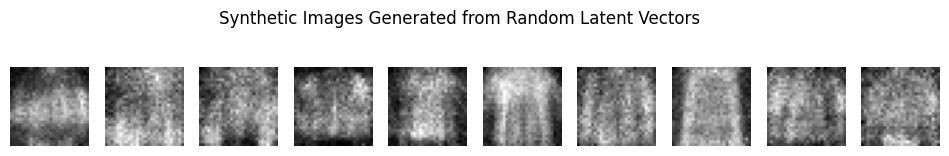

In [ ]:
# Sample random latent vectors from a standard normal distribution
num_samples = 10
latent_dim = 64  # Must match the latent dimension from your encoder
random_latents = torch.randn(num_samples, latent_dim)

# Generate synthetic images by passing the latent vectors through the decoder
with torch.no_grad():
    synthetic_images = model.decoder(random_latents)
synthetic_images = synthetic_images.view(-1, 28, 28)  # Reshape to 28x28 images

# Plot the synthetic images
plt.figure(figsize=(12, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_images[i].cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
plt.suptitle('Synthetic Images Generated from Random Latent Vectors')
plt.show()

Image quality is pretty bad visually in diversity, but some shapes are still recognizable. Let's see if we can make this better.

#Part 2: VAE systems

We are going to be implementing a VAE system. The major difference between this and an autoencoder is that this takes into account the mean and variance of the data within the latent space. The math is provided for sampling and integrating mean and variance respectively through the `reparameterize` function, taking the mean and variance as parameters.

##Try it yourself:
1. Modify the encoder portion before the latent space (from the autoencoder we made before) to create the separate layers required for mean and variance respectively
2. Modify the `forward` function to include these new layers. (Hint: reparameterize is used before the decoder is used)

In [ ]:
class VAE(nn.Module):
  def __init__(self):
    super(VAE, self).__init__()

    self.encoder = nn.Sequential(
        XXXX,
        XXXX
    )

    self.mu = XXXX
    self.logvar = XXXX

    self.decoder = nn.Sequential(
        nn.Linear(64, 128),
        nn.ReLU(True),
        nn.Linear(128, 28 * 28),
        nn.Sigmoid()
    )

  def reparameterize(self, mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

  def forward(self, x):
    x = XXXX
    mu = XXXX
    logvar = XXXX

    x = XXXX
    final = XXXX
    return final, mu, logvar

Training loop(same as before):

In [ ]:
# Initialize the model, loss function, and optimizer
model = VAE()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for data, _ in train_loader:
        optimizer.zero_grad()         # Zero the parameter gradients
        output = model(data)            # Forward pass
        recon, mu, logvar = output
        loss = criterion(recon, data)   # Compute reconstruction loss
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights

        running_loss += loss.item() * data.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/10, Loss: 0.4701
Epoch 2/10, Loss: 0.3605
Epoch 3/10, Loss: 0.3300
Epoch 4/10, Loss: 0.3183
Epoch 5/10, Loss: 0.3124
Epoch 6/10, Loss: 0.3089
Epoch 7/10, Loss: 0.3060
Epoch 8/10, Loss: 0.3033
Epoch 9/10, Loss: 0.3011
Epoch 10/10, Loss: 0.2992


Testing model...

In [ ]:
import torch
import torch.nn.functional as F
import math
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

# Evaluation on the test dataset
model.eval()  # Set model to evaluation mode

total_mse = 0.0
total_mae = 0.0
total_ssim = 0.0
num_samples = 0

with torch.no_grad():
    for data, _ in test_loader:
        recon, _, _ = model(data)  # Extract reconstruction from model output
        mse = F.mse_loss(recon, data, reduction='sum').item()
        mae = F.l1_loss(recon, data, reduction='sum').item()
        total_mse += mse
        total_mae += mae

        batch_size = data.size(0)
        num_samples += batch_size
        # Compute SSIM for each image in the batch
        for i in range(batch_size):
            # Reshape to 28x28 (images are flattened)
            input_img = data[i].view(28, 28).cpu().detach().numpy()
            output_img = recon[i].view(28, 28).cpu().detach().numpy()
            ssim_val = compare_ssim(input_img, output_img, data_range=1.0)
            total_ssim += ssim_val

avg_mse = total_mse / len(test_dataset)
avg_mae = total_mae / len(test_dataset)
avg_ssim = total_ssim / num_samples
avg_psnr = 10 * math.log10(1 / avg_mse) if avg_mse != 0 else float('inf')

print(f"Test MSE: {avg_mse:.4f}")
print(f"Test MAE: {avg_mae:.4f}")
print(f"Test PSNR: {avg_psnr:.2f} dB")
print(f"Test SSIM: {avg_ssim:.4f}")

Test MSE: 38.0785
Test MAE: 116.0359
Test PSNR: -15.81 dB
Test SSIM: 0.3740


Generating synthetic images using the decoder


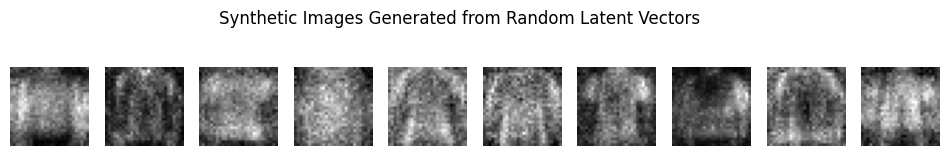

In [ ]:
# Sample random latent vectors from a standard normal distribution
num_samples = 10
latent_dim = 64  # Must match the latent dimension from your encoder
random_latents = torch.randn(num_samples, latent_dim)

# Generate synthetic images by passing the latent vectors through the decoder
with torch.no_grad():
    synthetic_images = model.decoder(random_latents)
synthetic_images = synthetic_images.view(-1, 28, 28)  # Reshape to 28x28 images

# Plot the synthetic images
plt.figure(figsize=(12, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_images[i].cpu().detach().numpy(), cmap='gray')
    plt.axis('off')
plt.suptitle('Synthetic Images Generated from Random Latent Vectors')
plt.show()

By using VAE we were able to create better synthetic data compared to before. However the quality of the images is still much to be desired. Some parameters that could be tinkered with include:
*  Latent space dimensionality (higher = better, but could very easily lead to overfitting)
*  Adding a KL divergence term(Also known as β-VAE)
*  Learning rate
*  Batch sizes
*  Number of Epochs
*  Different Optimizers